In [1]:
# Isohaline Transport Function Q(x,s,t) from TEF
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import TEF_Variables as tef

In [2]:
# Load fields
Qsg = 250
hs1 = 1
File1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/Qsg' + str(format(Qsg,'03d')) + '/state_' + str(format(hs1,'03d')) + '.nc')
State1 = File1.isel(T=~File1.get_index("T").duplicated())
Grid1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/Qsg' + str(format(Qsg,'03d')) + '/grid_' + str(format(hs1,'03d')) + '.nc')
# Confine to the range of fjord
state1 = State1.isel(X=range(260), Xp1=range(261), Y=range(35,45), T=range(1,len(State1.T)))
grid1 = Grid1.isel(X=range(260), Xp1=range(261), Y=range(35,45))

ot = state1.T.data # Ocean Time in seconds
x = grid1.X.data / 1000

S1 = state1.S.data # Salinity
U1 = (state1.U.data[:,:,:,1:] + state1.U.data[:,:,:,:-1]) / 2 # Along-channel velocity
drF1 = np.broadcast_to(grid1.drF.data[np.newaxis, :, np.newaxis, np.newaxis], U1.shape)
dyF1 = np.broadcast_to(grid1.dyF.data[np.newaxis, np.newaxis, :, :], U1.shape)
HFacC1 = np.broadcast_to(grid1.HFacC.data[np.newaxis, :, :, :], U1.shape)
DA1 = drF1 * dyF1 * HFacC1 # Cell area



hs2 = 5
File2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/Qsg' + str(format(Qsg,'03d')) + '/state_' + str(format(hs2,'03d')) + '.nc')
State2 = File2.isel(T=~File2.get_index("T").duplicated())
Grid2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/Qsg' + str(format(Qsg,'03d')) + '/grid_' + str(format(hs2,'03d')) + '.nc')
# Confine to the range of fjord
state2 = State2.isel(X=range(260), Xp1=range(261), Y=range(35,45), T=range(1,len(State2.T)))
grid2 = Grid2.isel(X=range(260), Xp1=range(261), Y=range(35,45))

S2 = state2.S.data # Salinity
U2 = (state2.U.data[:,:,:,1:] + state2.U.data[:,:,:,:-1]) / 2 # Along-channel velocity
drF2 = np.broadcast_to(grid2.drF.data[np.newaxis, :, np.newaxis, np.newaxis], U2.shape)
dyF2 = np.broadcast_to(grid2.dyF.data[np.newaxis, np.newaxis, :, :], U2.shape)
HFacC2 = np.broadcast_to(grid2.HFacC.data[np.newaxis, :, :, :], U2.shape)
DA2 = drF2 * dyF2 * HFacC2 # Cell area



hs3 = 6
File3 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/Qsg' + str(format(Qsg,'03d')) + '/state_' + str(format(hs3,'03d')) + '.nc')
State3 = File3.isel(T=~File3.get_index("T").duplicated())
Grid3 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/Qsg' + str(format(Qsg,'03d')) + '/grid_' + str(format(hs3,'03d')) + '.nc')
# Confine to the range of fjord
state3 = State3.isel(X=range(260), Xp1=range(261), Y=range(35,45), T=range(1,len(State3.T)))
grid3 = Grid3.isel(X=range(260), Xp1=range(261), Y=range(35,45))

S3 = state3.S.data # Salinity
U3 = (state3.U.data[:,:,:,1:] + state3.U.data[:,:,:,:-1]) / 2 # Along-channel velocity
drF3 = np.broadcast_to(grid3.drF.data[np.newaxis, :, np.newaxis, np.newaxis], U3.shape)
dyF3 = np.broadcast_to(grid3.dyF.data[np.newaxis, np.newaxis, :, :], U3.shape)
HFacC3 = np.broadcast_to(grid3.HFacC.data[np.newaxis, :, :, :], U3.shape)
DA3 = drF3 * dyF3 * HFacC3 # Cell area




In [3]:
xrange = np.arange(1,260)
NX = len(xrange)
sedges = np.linspace(0, 35, 1001) 
sbins = sedges[:-1] + np.diff(sedges)/2
NS = len(sedges)
NT = len(ot)

Qxs1 = np.zeros((NS,NX))
Qxs2 = np.zeros((NS,NX)) 
Qxs3 = np.zeros((NS,NX)) 
#xi = 50

for xi in range(NX):
    
    tef_q1, tef_vel1, tef_da1, tef_qs1, tef_qs21, sbins1 = tef.process_section(U1,S1,DA1,ot,xi+xrange[0],23,testing=False)
    tef_q2, tef_vel2, tef_da2, tef_qs2, tef_qs22, sbins2 = tef.process_section(U2,S2,DA2,ot,xi+xrange[0],23,testing=False) 
    tef_q3, tef_vel3, tef_da3, tef_qs3, tef_qs23, sbins3 = tef.process_section(U3,S3,DA3,ot,xi+xrange[0],23,testing=False) 

    # calculate Q(s) and Q_s(s), and etc.
    Qv1=np.zeros((NT, NS))
    Qv2=np.zeros((NT, NS))
    Qv3=np.zeros((NT, NS))
    # Note that these are organized low s to high s, but still follow
    # the TEF formal definitions from MacCready (2011)
    Qv1[:,:-1] = np.fliplr(np.cumsum(np.fliplr(tef_q1), axis=1))
    Qxs1[:,xi] = Qv1[89:,:].mean(0)
    
    Qv2[:,:-1] = np.fliplr(np.cumsum(np.fliplr(tef_q2), axis=1))
    Qxs2[:,xi] = Qv2[89:,:].mean(0)
    
    Qv3[:,:-1] = np.fliplr(np.cumsum(np.fliplr(tef_q3), axis=1))
    Qxs3[:,xi] = Qv3[89:,:].mean(0)
    
    del Qv1, tef_q1, tef_vel1, tef_da1, tef_qs1, tef_qs21
    del Qv2, tef_q2, tef_vel2, tef_da2, tef_qs2, tef_qs22
    del Qv3, tef_q3, tef_vel3, tef_da3, tef_qs3, tef_qs23

  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120
  time 0 out of 120


In [85]:
sedges[900], np.nanmax(Qxs1), np.nanmin(Qxs1), np.nanmax(Qxs2), np.nanmin(Qxs2), np.nanmax(Qxs3), np.nanmin(Qxs3)

(31.500000000000004,
 254.91237617372306,
 -9168.10901523505,
 257.4190723197572,
 -8509.613523663278,
 1116.5502946646866,
 -6613.639826259966)

In [ ]:
fig1 = plt.figure(figsize=(12,12))
fig1.tight_layout()
    

ax1 = fig1.add_subplot(211)
cs1 = np.linspace(0,1,10)
cs2 = np.linspace(-2.5,0,10)
cmap = 'RdBu_r'
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
CS1 = ax1.contour(x[xrange], sedges[:650], Qxs[:650,:]/1000, cs1, colors='k',linewidths=.7)
plt.clabel(CS1, fmt='%1.1f', fontsize=14, colors='k')
CS2 = ax1.contour(x[xrange], sedges[650:], Qxs[650:,:]/1000, cs2, colors='k',linewidths=.7)
plt.clabel(CS2, fmt='%1.1f', fontsize=14, colors='k')
#im1 = ax1.contourf(x[xrange], sedges, Qxs/1000, cs, cmap=cmap,extend='both')
#cbaxes = fig1.add_axes([0.75, .9, 0.15, 0.02])
#cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
#cbar.set_ticks([-4, -3, -2, -1, 0, 1])
#cbar.ax.set_title(r'Q(x,s) ($10^3\;m^3/s$)', size=12)

loc1, loc2, loc3 = 25, 63, 110
xloc = np.array([x[xrange[loc1]], x[xrange[loc2]], x[xrange[loc3]]])
yloc = np.array([27, 27, 27])
ax1.scatter(xloc, yloc, s=100, c=['r','g','b'], marker='^')
ax1.axvline(x=x[47], color='k',lw=2,linestyle='--')
ax1.axvline(x=x[96], color='k',lw=2,linestyle='--')
#ax1.axvline(x=x[loc3], color='b',lw=2,linestyle='--')

ax1.text(0.7, 29, r'(a) $Q(x,s)/[10^3\;m^3/s]$', fontweight='bold',fontsize=15, color='k')
ax1.set_ylim(22,30)
ax1.invert_yaxis()
#ax1.set_xlim([0, 9])
#ax1.set_xticks([0, 3, 6, 9])
ax1.set_ylabel(r'Salinity [psu]',size = 15)
ax1.set_xlabel(r'Distance from glacier (x) [km]', size = 15)


ax2 = fig1.add_subplot(212)
ax2.plot(Qxs[:,loc1]/1e3,sedges,'r-',lw=2,label=r'Section 1')
ax2.plot(Qxs[:,loc2]/1e3,sedges,'g-',lw=2,label=r'Section 2')
ax2.plot(Qxs[:,loc3]/1e3,sedges,'b-',lw=2,label=r'Section 3')
#ax2.set_ylim(20,25)
ax2.axvline(x=0, color='k',lw=.7)
ax2.legend(loc='best', fontsize=15)
ax2.invert_yaxis()
#ax2.legend(loc='right', fontsize=15)
ax2.set_ylabel(r'Salinity [psu]',size = 15)
ax2.set_xlabel(r'$Q/[10^3\;m^3/s]$', size = 15)


In [ ]:
# TEF outputs plot for old simulation (Qsg=500, small fjord)
hsr = np.array([0.04, 0.12, 1])
fig3, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(12,12))

    
cs1 = np.linspace(0,1,10)
cs2 = np.linspace(-2.5,0,10)
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'


CS1 = ax1.contour(x[xrange], sedges[:830], Qxs3[:830,:]/1000, np.linspace(0,.5,6), colors='k',linewidths=.7)
plt.clabel(CS1, fmt='%1.1f', fontsize=14, colors='b')
CS2 = ax1.contour(x[xrange], sedges[830:], Qxs3[830:,:]/1000, np.linspace(-3.5,0,10), colors='k',linewidths=.7)
plt.clabel(CS2, fmt='%1.1f', fontsize=14, colors='b')
ax1.axvline(x=x[5],color='k',linestyle='--')
ax1.axvline(x=x[48],color='k',linestyle='--')
ax1.axvline(x=x[97],color='k',linestyle='--')
ax1.set_ylabel(r'Salinity [psu]',size = 15)
ax1.set_ylim(28,35)
ax1.invert_yaxis()
ax1.xaxis.set_visible(False) # This erases the y ticks
ax1.set_title('(a) $h_s/h=1.0$', loc='left', size=15, weight='bold')
ax1.set_title(r'$Q(x,s)/[10^3\;m^3/s]$', loc='center', size=15)

CS3 = ax2.contour(x[xrange], sedges[:830], Qxs2[:830,:]/1000, np.linspace(0,.5,6), colors='k',linewidths=.7)
plt.clabel(CS3, fmt='%1.1f', fontsize=14, colors='b')
CS4 = ax2.contour(x[xrange], sedges[830:], Qxs2[830:,:]/1000, np.linspace(-3.2,0,10), colors='k',linewidths=.7)
plt.clabel(CS4, fmt='%1.1f', fontsize=14, colors='b')
ax2.axvline(x=x[5],color='k',linestyle='--')
ax2.axvline(x=x[48],color='k',linestyle='--')
ax2.axvline(x=x[97],color='k',linestyle='--')
ax2.set_ylabel(r'Salinity [psu]',size = 15)
ax2.set_ylim(28,35)
ax2.invert_yaxis()
ax2.xaxis.set_visible(False) # This erases the y ticks
ax2.set_title('(b) $h_s/h=0.12$', loc='left', size=15, weight='bold')
    
CS5 = ax3.contour(x[xrange], sedges[:650], Qxs1[:650,:]/1000, np.linspace(0,.5,6), colors='k',linewidths=.7)
plt.clabel(CS5, fmt='%1.1f', fontsize=14, colors='b')
CS6 = ax3.contour(x[xrange], sedges[650:], Qxs1[650:,:]/1000, np.linspace(-2.4,0,10), colors='k',linewidths=.7)
plt.clabel(CS6, fmt='%1.1f', fontsize=14, colors='b')
ax3.axvline(x=x[5],color='k',linestyle='--')
ax3.axvline(x=x[48],color='k',linestyle='--')
ax3.axvline(x=x[97],color='k',linestyle='--')
ax3.set_ylabel(r'Salinity [psu]',size = 15)
ax3.set_ylim(22,29)
ax3.invert_yaxis()
ax3.set_xlim([0, 9])
ax3.set_xticks([0, 3, 6, 9])
#ax3.set_xticklabels(["0","3","6","9"], size=15)
ax3.set_xlabel('Distance from glacier [km]', size = 15)
ax3.set_title('(c) $h_s/h=0.04$', loc='left', size=15, weight='bold')

Text(0.0, 1.0, '(c) $h_s/h=0.04$')

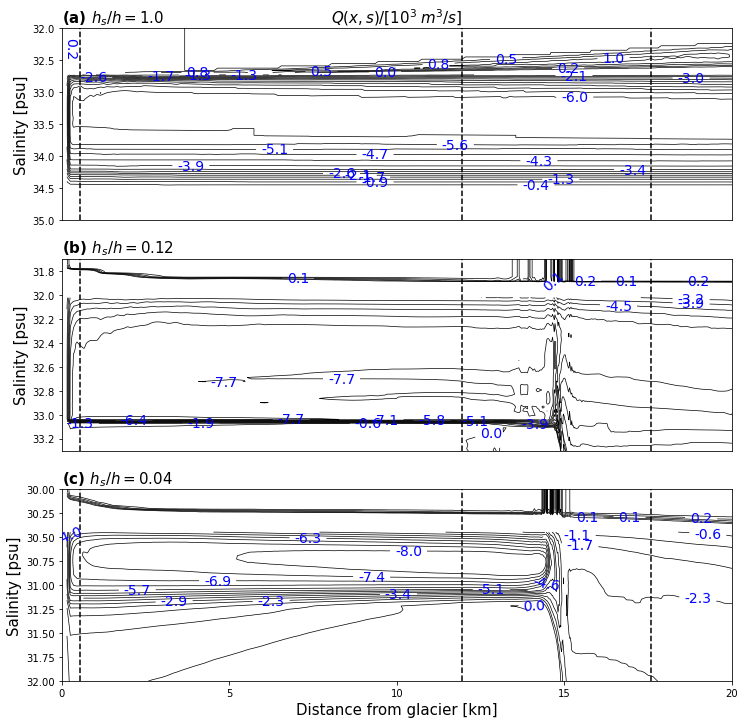

In [111]:
# TEF outputs plot
hsr = np.array([0.04, 0.12, 1])
fig3, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(12,12))

    

import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'


CS1 = ax1.contour(x[xrange], sedges[:935], Qxs3[:935,:]/1000, np.linspace(0,1,5), colors='k',linewidths=.7)
plt.clabel(CS1, fmt='%1.1f', fontsize=14, colors='b')
CS2 = ax1.contour(x[xrange], sedges[935:], Qxs3[935:,:]/1000, np.linspace(-6,0,15), colors='k',linewidths=.7)
plt.clabel(CS2, fmt='%1.1f', fontsize=14, colors='b')
ax1.axvline(x=x[5],color='k',linestyle='--')
ax1.axvline(x=x[119],color='k',linestyle='--')
ax1.axvline(x=x[234],color='k',linestyle='--')
ax1.set_ylabel(r'Salinity [psu]',size = 15)
ax1.set_ylim(32,35)
ax1.invert_yaxis()
ax1.xaxis.set_visible(False) # This erases the y ticks
ax1.set_title('(a) $h_s/h=1.0$', loc='left', size=15, weight='bold')
ax1.set_title(r'$Q(x,s)/[10^3\;m^3/s]$', loc='center', size=15)

CS3 = ax2.contour(x[xrange], sedges[:915], Qxs2[:915,:]/1000, np.linspace(0,.2,5), colors='k',linewidths=.7)
plt.clabel(CS3, fmt='%1.1f', fontsize=14, colors='b')
CS4 = ax2.contour(x[xrange], sedges[915:], Qxs2[915:,:]/1000, np.linspace(-9,0,15), colors='k',linewidths=.7)
plt.clabel(CS4, fmt='%1.1f', fontsize=14, colors='b')
ax2.axvline(x=x[5],color='k',linestyle='--')
ax2.axvline(x=x[119],color='k',linestyle='--')
ax2.axvline(x=x[234],color='k',linestyle='--')
ax2.set_ylabel(r'Salinity [psu]',size = 15)
ax2.set_ylim(31.7,33.3)
ax2.invert_yaxis()
ax2.xaxis.set_visible(False) # This erases the y ticks
ax2.set_title('(b) $h_s/h=0.12$', loc='left', size=15, weight='bold')
    
CS5 = ax3.contour(x[xrange], sedges[:870], Qxs1[:870,:]/1000, np.linspace(0,.2,5), colors='k',linewidths=.7)
plt.clabel(CS5, fmt='%1.1f', fontsize=14, colors='b')
CS6 = ax3.contour(x[xrange], sedges[870:], Qxs1[870:,:]/1000, np.linspace(-8,0,15), colors='k',linewidths=.7)
plt.clabel(CS6, fmt='%1.1f', fontsize=14, colors='b')
ax3.axvline(x=x[5],color='k',linestyle='--')
ax3.axvline(x=x[119],color='k',linestyle='--')
ax3.axvline(x=x[234],color='k',linestyle='--')
ax3.set_ylabel(r'Salinity [psu]',size = 15)
ax3.set_ylim(30,32)
ax3.invert_yaxis()
ax3.set_xlim([0, 20])
ax3.set_xticks([0, 5, 10, 15, 20])
#ax3.set_xticklabels(["0","3","6","9"], size=15)
ax3.set_xlabel('Distance from glacier [km]', size = 15)
ax3.set_title('(c) $h_s/h=0.04$', loc='left', size=15, weight='bold')
    


In [ ]:
x[xrange[5]], x[xrange[15]], x[xrange[36]], np.linspace(0,.5,6)

In [ ]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/TEF/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig3.savefig(fig_path + '/Qxs_comp.png', dpi=200, bbox_inches='tight')
#fig2.savefig(fig_path + '/Sections.png', dpi=200, bbox_inches='tight')
#fig3.savefig(fig_path + '/Sections.png', dpi=200, bbox_inches='tight')